<a href="https://colab.research.google.com/github/rajput-t/deep_learning/blob/main/Activation_Functions_and_Building_ANN(Keras_TensorFlow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Deep Learning

## What is an Artificial Neural Network?

- ANN is inspired by the structure and function of the human brain.
- A neural network is made of **layers of neurons**:
  - **Input layer**: Receives the input features
  - **Hidden layers**: Learn patterns via weights and biases
  - **Output layer**: Produces final predictions

Each neuron applies a **weighted sum + bias**, then passes it through an **activation function**.

---

## Activation Functions

here are some of the most commonly used activation functions visualized in the following plot:

- **Sigmoid**: Smooth function, outputs between 0 and 1
- **Tanh**: Like sigmoid but outputs between -1 and 1
- **ReLU**: Rectified Linear Unit; fast, widely used in deep learning

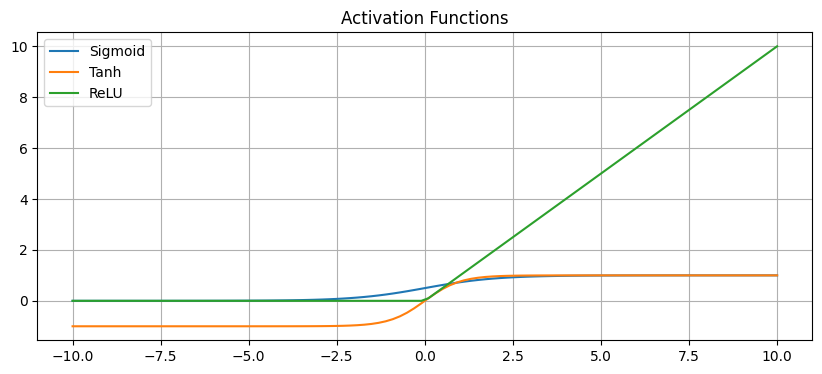

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)
relu = np.maximum(0, x)

plt.figure(figsize=(10, 4))
plt.plot(x, sigmoid, label='Sigmoid')
plt.plot(x, tanh, label='Tanh')
plt.plot(x, relu, label='ReLU')
plt.title('Activation Functions')
plt.legend()
plt.grid(True)
plt.show()

# Building an Artificial First Neural Network (Keras/TensorFlow)

Using Keras (built into TensorFlow) to build a simple ANN to classify iris flowers.


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import numpy as np

## Dataset

The Iris dataset is a classic dataset in machine learning. It contains measurements of four features (sepal length, sepal width, petal length, and petal width) for 150 iris flowers. The flowers belong to one of three species:

- **0: Setosa**
- **1: Versicolor**
- **2: Virginica**

The target values represent these three species, encoded as 0, 1, and 2. The model is trained to predict the species of an iris flower based on its measurements.

In [16]:
iris = load_iris()
X = iris.data
y = iris.target

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode target labels
lb = LabelBinarizer()
y_encoded = lb.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

## Building the Neural Network Model

The code cell above builds a simple Sequential model using Keras.

### ANN Architecture
*   **`Dense(10, input_shape=(4,), activation='relu')`**: This is the **first hidden layer**.
    *   `Dense` indicates a fully connected layer, meaning each node in this layer is connected to every node in the previous layer (in this case, the input layer).
    *   `10` is the number of nodes (or neurons) in this layer.
    *   `input_shape=(4,)` specifies the shape of the input data (4 features for each iris flower). This is only needed for the very first layer.
    *   `activation='relu'` is the activation function used by the nodes in this layer. ReLU (Rectified Linear Unit) is a common choice that helps the network learn complex patterns.
*   **`Dense(8, activation='relu')`**: This is the **second hidden layer**.
    *   It has `8` nodes and also uses the `relu` activation function. It receives input from the previous layer (the first hidden layer with 10 nodes).
*   **`Dense(3, activation='softmax')`**: This is the **output layer**.
    *   It has `3` nodes, corresponding to the three different species of iris flowers we are trying to classify.
    *   `activation='softmax'` is used in the output layer for multi-class classification. It outputs a probability distribution over the three classes, meaning the output values for each sample will sum up to 1, and each value represents the model's confidence that the sample belongs to that specific class.
    
### model.compile(...)
This configures the model for training.

*   `optimizer='adam'` is the optimization algorithm used to update the model's weights during training. Adam is a popular and effective optimizer.
*   `loss='categorical_crossentropy'` is the loss function used to measure how well the model is performing. Categorical crossentropy is suitable for multi-class classification when the target labels are one-hot encoded.
*   `metrics=['accuracy']` specifies the metric used to evaluate the model's performance during training and testing. Accuracy measures the proportion of correctly classified samples.





In [17]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(4,)), # Use Input layer to specify input shape
    Dense(10, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes in Iris dataset
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [18]:
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6680 - loss: 1.0066 - val_accuracy: 0.7667 - val_loss: 0.9594
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6838 - loss: 0.9691 - val_accuracy: 0.7667 - val_loss: 0.9101
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7456 - loss: 0.8980 - val_accuracy: 0.7667 - val_loss: 0.8549
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7017 - loss: 0.8546 - val_accuracy: 0.7667 - val_loss: 0.8025
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7444 - loss: 0.8321 - val_accuracy: 0.7667 - val_loss: 0.7553
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7113 - loss: 0.7758 - val_accuracy: 0.7667 - val_loss: 0.7119
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7176 - loss: 0.7491 - val_accuracy: 0.8000 - val_loss: 0.6702
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7724 - loss: 0.7093 - val_accuracy: 0.8000 - val_loss

## Evaluate and Plot Results

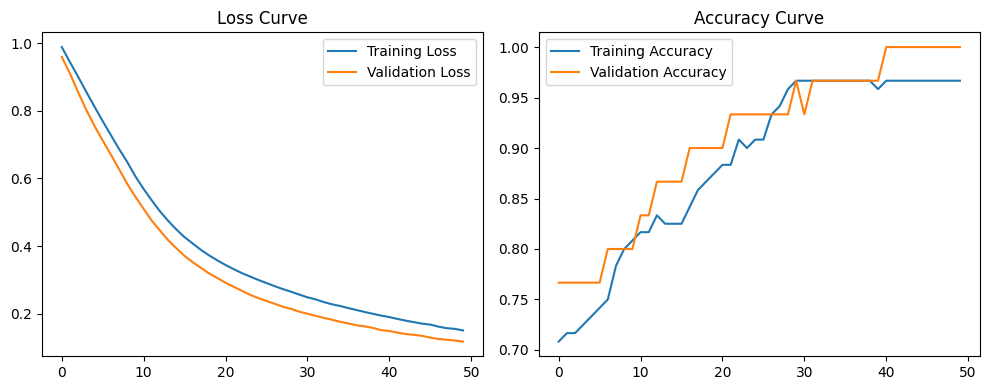

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

## Prediction and Interpretation

In [20]:
# Function to output the name of the flower
def get_flower_name(target_number):
  """Returns the flower name based on the target number."""
  if target_number == 0:
    return "Setosa"
  elif target_number == 1:
    return "Versicolor"
  elif target_number == 2:
    return "Virginica"
  else:
    return "Invalid target number"

In [21]:
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Setosa-like input
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
predicted_class = lb.inverse_transform(prediction)
print("Predicted class:", get_flower_name(predicted_class[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted class: Setosa


## Prediction result

Based on the provided sample input and the trained neural network model, the predicted species of the iris flower is **Setosa**. This prediction was made by feeding the scaled measurements of the sample (sepal length, sepal width, petal length, and petal width) into the model, which then output a probability distribution across the three possible species. The model's highest probability was assigned to the Setosa class, resulting in the final prediction.